#Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading data

In [32]:
df = pd.read_csv('DataScience.csv')

#Preprocessing

In [33]:
print(df.shape)
print(df.head(3))
print(df.columns)
print(df.info())
print(df.isnull().sum())
df.dropna(inplace=True)

(2253, 16)
   Unnamed: 0                                          Job Title  \
0           0  Data Analyst, Center on Immigration and Justic...   
1           1                               Quality Data Analyst   
2           2  Senior Data Analyst, Insights & Analytics Team...   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   

                     Size  Fo

##Salary Parsing

In [34]:
df = df[df['Salary Estimate'] != '-1']
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
new_salary = salary.apply(lambda x: x.replace('K','').replace('$',''))

df['min_salary'] = new_salary.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = new_salary.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary) / 2

<ipython-input-34-3278c9c05833>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_salary'] = new_salary.apply(lambda x: int(x.split('-')[0]))
<ipython-input-34-3278c9c05833>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary'] = new_salary.apply(lambda x: int(x.split('-')[1]))
<ipython-input-34-3278c9c05833>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

##Company name

In [35]:
df['Company text'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis=1)
df['Company text'] = df['Company text'].apply(lambda x: x.replace('\n',('')))

##States

In [107]:
df['state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.state.value_counts()

 CA          626
 TX          394
 NY          345
 IL          164
 PA          114
 AZ           97
 NC           89
 CO           88
 NJ           86
 WA           53
 VA           48
 OH           35
 UT           33
 FL           27
 IN           23
 DE           11
 Arapahoe      8
 GA            4
 KS            3
 SC            3
Name: state, dtype: int64

In [116]:
df.state = df.state.apply(lambda x: x.strip() if x.strip().lower() != 'arapahoe' else 'CO')
df.state.value_counts()

CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
CO     96
NC     89
NJ     86
WA     53
VA     48
OH     35
UT     33
FL     27
IN     23
DE     11
GA      4
SC      3
KS      3
Name: state, dtype: int64

##Age of the company

In [37]:
df['age'] = df.Founded.apply(lambda x: x if x<1 else 2023 - x)

##Job Description

###Python

In [38]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

###SQL

In [39]:
df['sql'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
print('SQL',df.sql.value_counts())

SQL 1    1387
0     864
Name: sql, dtype: int64


###spark

In [40]:
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
print('Spark',df.spark.value_counts())

Spark 0    2162
1      89
Name: spark, dtype: int64


###aws

In [41]:
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
print('aws',df.aws.value_counts())

aws 0    1976
1     275
Name: aws, dtype: int64


###excel

In [42]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
print('excel',df.excel.value_counts())

excel 1    1352
0     899
Name: excel, dtype: int64


###Tableau

In [43]:
df['tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
print('tableau',df.tableau.value_counts())

tableau 0    1631
1     620
Name: tableau, dtype: int64


##Job Title and Seniority

In [44]:
def job_title(title):
  if 'data scientist' in title.lower():
    return 'data scientist'
  elif 'data engineer' in title.lower():
    return 'data engineer'
  elif 'analyst' in title.lower():
    return 'analyst'
  elif 'machine learning' in title.lower():
    return 'machine learning'
  elif 'manager' in title.lower():
    return 'manager'
  elif 'director' in title.lower():
    return 'director'
  else:
    return 'na'

In [45]:
def seniority(title):
  if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
    return 'senior'
  elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
    return 'junior'
  else:
    return 'na'

In [46]:
df['job_simplified'] = df['Job Title'].apply(job_title)
df['seniority'] = df['Job Title'].apply(seniority)

In [47]:
df.seniority.value_counts()

na        1704
senior     474
junior      73
Name: seniority, dtype: int64

##Job description length

In [48]:
df['description length'] = df['Job Description'].apply(lambda x: len(x))

##Competitors 

In [49]:
df['number_competitors'] = df['Competitors'].apply(lambda x: len(x.split()) if x != '-1' else 0)

##Save cleaned

In [137]:
df_output = df.drop(['Unnamed: 0','Easy Apply'], axis=1)
print(df_output.columns)
df_output.to_csv('Salary_cleaned.csv', index=False)

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company text', 'state',
       'age', 'python', 'sql', 'spark', 'aws', 'excel', 'tableau',
       'job_simplified', 'seniority', 'description length',
       'number_competitors'],
      dtype='object')


#Exploratory Data Analysis (EDA)

In [117]:
df_output.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age,python,sql,spark,aws,excel,tableau,description length,number_competitors
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000
mean,3.161928,1398.876944,54.267437,89.975122,72.121279,31.286539,0.282985,0.616171,0.039538,0.122168,0.600622,0.275433,3120.365615,1.002221
std,1.663451,901.758003,19.579706,29.321502,23.605836,45.272813,0.450549,0.486425,0.194914,0.327552,0.489879,0.446832,1858.823549,2.061390
min,-1.000000,-1.000000,24.000000,38.000000,33.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,3.100000,-1.000000,41.000000,70.000000,58.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1760.500000,0.000000
50%,3.600000,1979.000000,50.000000,87.000000,69.000000,19.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2883.000000,0.000000
75%,4.000000,2002.000000,64.000000,104.000000,80.500000,36.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4119.000000,0.000000
max,5.000000,2019.000000,113.000000,190.000000,150.000000,341.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18664.000000,14.000000


In [118]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 0 to 2252
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           2251 non-null   object 
 1   Salary Estimate     2251 non-null   object 
 2   Job Description     2251 non-null   object 
 3   Rating              2251 non-null   float64
 4   Company Name        2251 non-null   object 
 5   Location            2251 non-null   object 
 6   Headquarters        2251 non-null   object 
 7   Size                2251 non-null   object 
 8   Founded             2251 non-null   int64  
 9   Type of ownership   2251 non-null   object 
 10  Industry            2251 non-null   object 
 11  Sector              2251 non-null   object 
 12  Revenue             2251 non-null   object 
 13  Competitors         2251 non-null   object 
 14  min_salary          2251 non-null   int64  
 15  max_salary          2251 non-null   int64  
 16  avg_sa

##Continous variables

###Histogram

<AxesSubplot:>

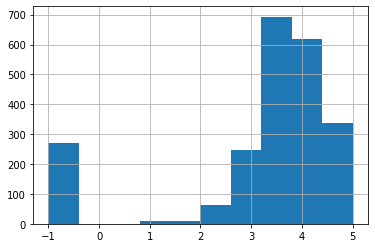

In [119]:
df_output.Rating.hist()

<AxesSubplot:>

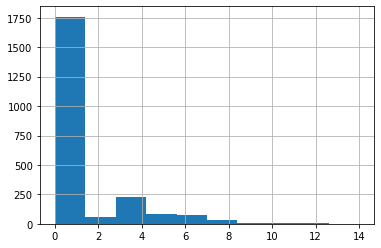

In [120]:
df_output.number_competitors.hist()

<AxesSubplot:>

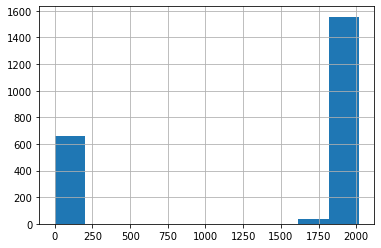

In [121]:
df_output.Founded.hist()

<AxesSubplot:>

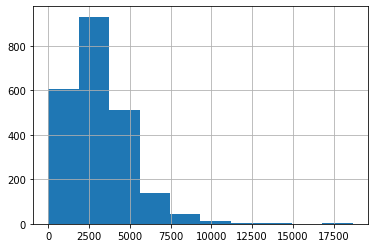

In [122]:
df_output['description length'].hist()

<AxesSubplot:>

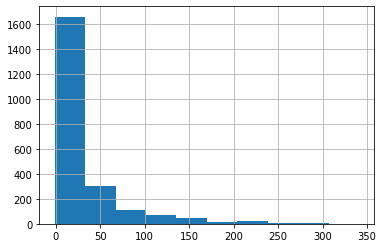

In [123]:
df_output.age.hist()

###Box plot

<AxesSubplot:>

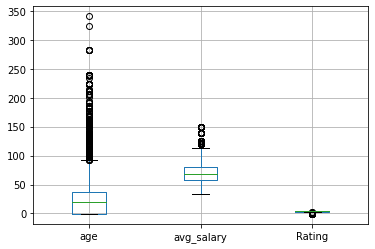

In [124]:
df_output.boxplot(column=['age', 'avg_salary','Rating'])

<AxesSubplot:>

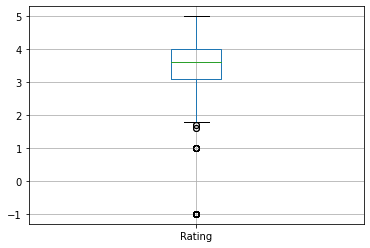

In [125]:
df_output.boxplot(column='Rating')

In [126]:
df_output[['age', 'avg_salary','Rating','description length']].corr()

,age,avg_salary,Rating,description length
age,1.000000,-0.074963,0.196459,0.255158
avg_salary,-0.074963,1.000000,0.004489,-0.033598
Rating,0.196459,0.004489,1.000000,-0.019444
description length,0.255158,-0.033598,-0.019444,1.000000


<AxesSubplot:>

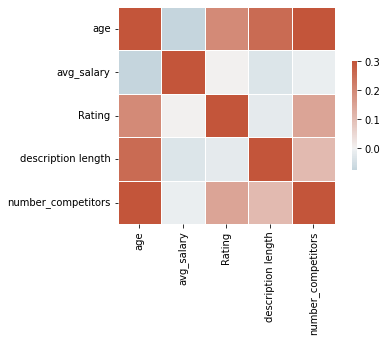

In [127]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_output[['age', 'avg_salary','Rating','description length','number_competitors']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Categorical variables

In [128]:
df_output.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company text', 'state',
       'age', 'python', 'sql', 'spark', 'aws', 'excel', 'tableau',
       'job_simplified', 'seniority', 'description length',
       'number_competitors'],
      dtype='object')

###Bar charts

In [129]:
categorical_df = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company text', 'state','python', 'sql', 'spark', 'aws', 'excel', 'tableau',
       'job_simplified', 'seniority']]

Graph for Location: total = 253


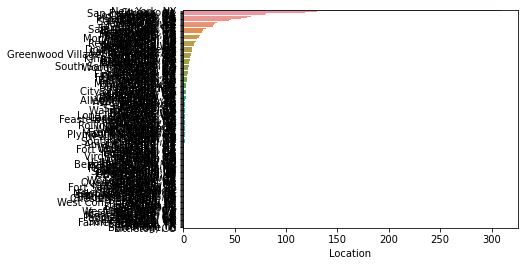




Graph for Headquarters: total = 483


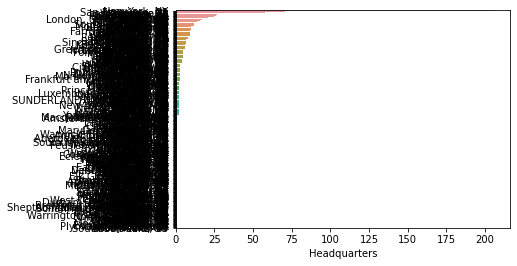




Graph for Size: total = 9


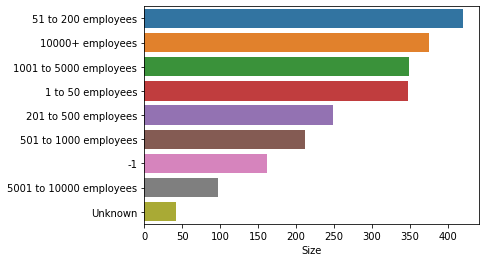




Graph for Type of ownership: total = 15


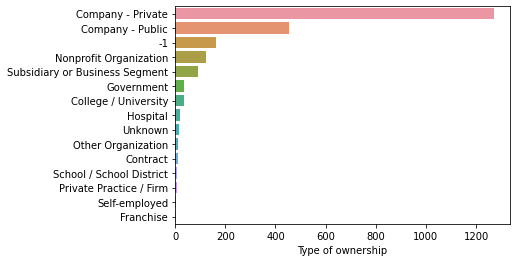




Graph for Industry: total = 89


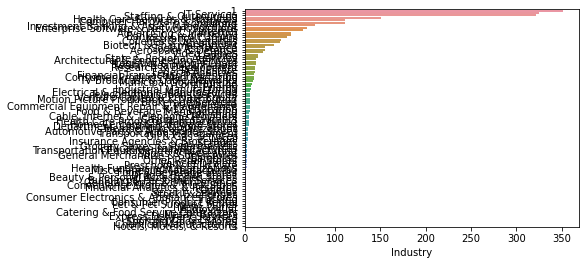




Graph for Sector: total = 25


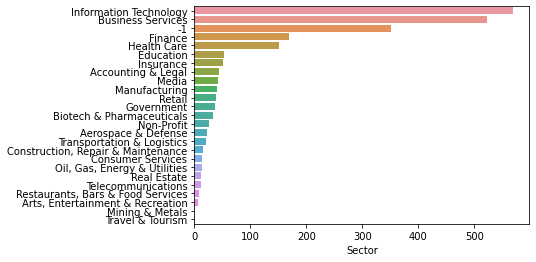




Graph for Revenue: total = 14


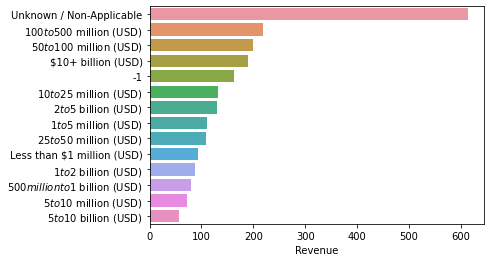




Graph for Company text: total = 1501


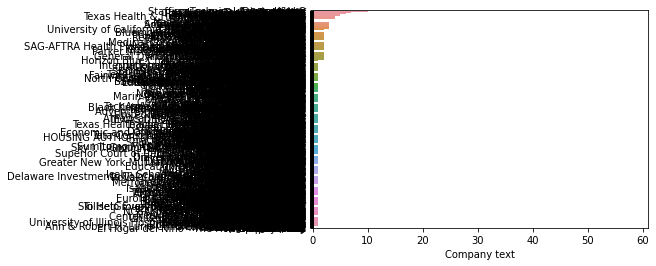




Graph for state: total = 19


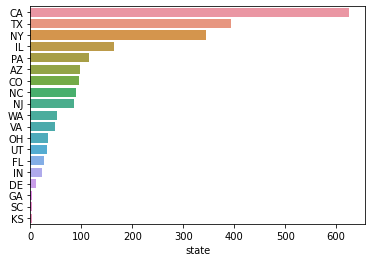




Graph for python: total = 2


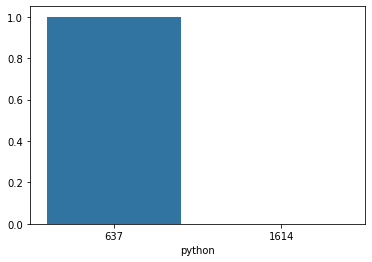




Graph for sql: total = 2


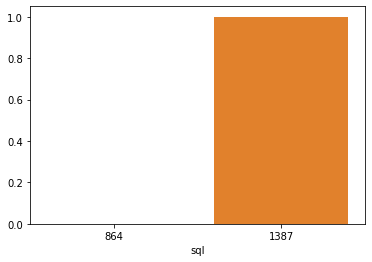




Graph for spark: total = 2


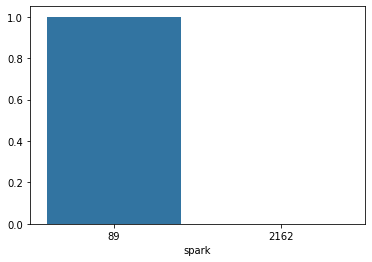




Graph for aws: total = 2


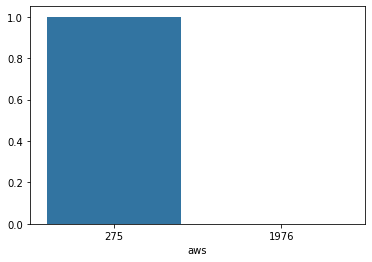




Graph for excel: total = 2


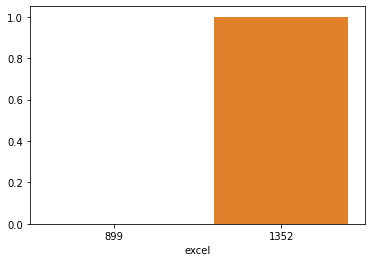




Graph for tableau: total = 2


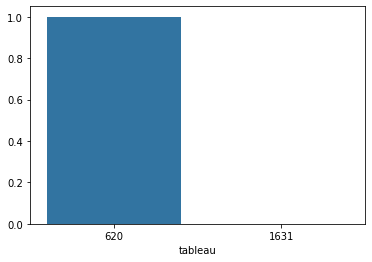




Graph for job_simplified: total = 3


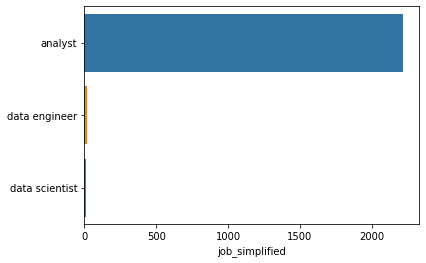




Graph for seniority: total = 3


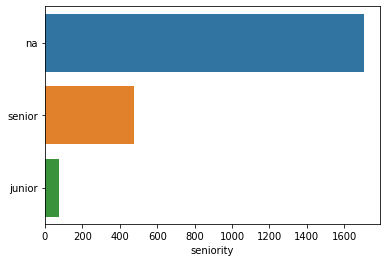

In [130]:
for i in categorical_df.columns:
  catego_num = categorical_df[i].value_counts()
  print('Graph for %s: total = %d'%(i,len(catego_num)))
  sns.barplot(x=catego_num, y=catego_num.index)
  plt.show()
  print('\n\n')

Graph for Location: total = 20


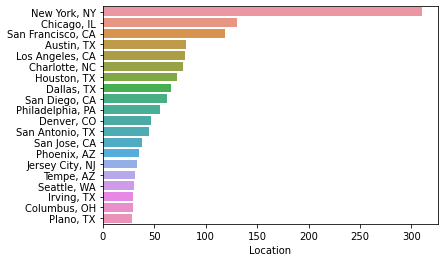




Graph for Headquarters: total = 20


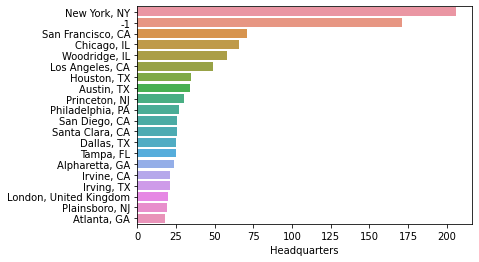




Graph for Size: total = 9


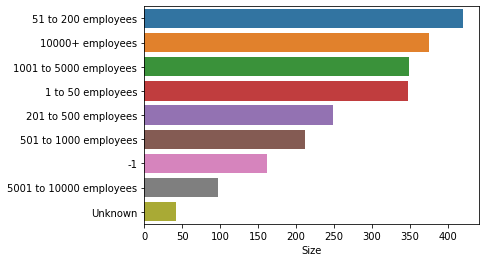




Graph for Industry: total = 20


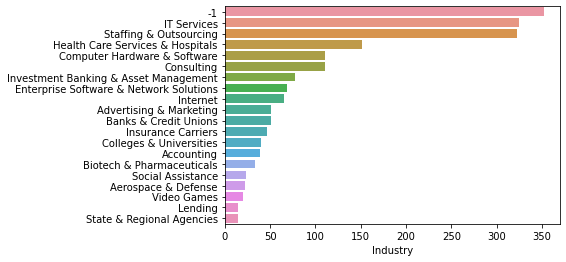




Graph for Company text: total = 20


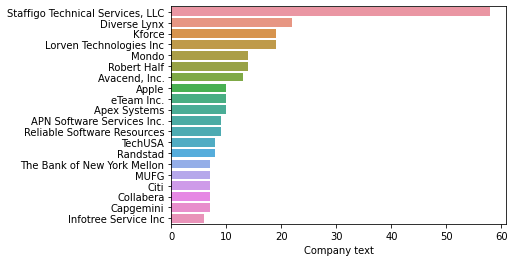

In [131]:
for i in categorical_df[['Location', 'Headquarters', 'Size','Industry','Company text']].columns:
  catego_num = categorical_df[i].value_counts()[:20]
  print('Graph for %s: total = %d'%(i,len(catego_num)))
  sns.barplot(x=catego_num, y=catego_num.index)
  plt.show()
  print('\n\n')

###Pivot tables

In [139]:
df_output.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company text', 'state',
       'age', 'python', 'sql', 'spark', 'aws', 'excel', 'tableau',
       'job_simplified', 'seniority', 'description length',
       'number_competitors'],
      dtype='object')

In [161]:
pivot_df = df_output[['Rating','Industry', 'Sector', 'Revenue','number_competitors','python', 'sql', 'spark', 'aws', 'excel', 'tableau','description length','Type of ownership','avg_salary']]

In [132]:
pd.pivot_table(df_output, index='job_simplified', values='avg_salary')

,avg_salary
job_simplified,
analyst,72.168468
data engineer,67.058824
data scientist,70.785714


In [133]:
pd.pivot_table(df_output, index=['job_simplified','seniority'], values='avg_salary')

avg_salary
job_simplified seniority            
analyst        junior      63.232877
               na          71.878121
               senior      74.621505
data engineer  na          68.076923
               senior      63.750000
data scientist na          63.166667
               senior      84.500000

In [138]:
pd.pivot_table(df_output, index=['state','job_simplified'], values='avg_salary').sort_values('state', ascending=False)

avg_salary
state job_simplified            
WA    analyst          64.754717
VA    analyst          65.187500
UT    data scientist   36.500000
      data engineer    36.500000
      analyst          37.672414
TX    data engineer    69.833333
      analyst          58.820876
      data scientist   38.666667
SC    analyst          68.333333
PA    data engineer    88.500000
      analyst          61.491150
OH    data scientist   40.000000
      analyst          45.515152
NY    data scientist   72.000000
      data engineer    66.500000
      analyst          71.422515
NJ    data scientist   66.500000
      analyst          73.076471
NC    analyst          68.022727
      data engineer    68.000000
KS    analyst          51.500000
IN    analyst          47.500000
IL    data scientist   95.250000
      data engineer    77.500000
      analyst          78.109375
GA    analyst          44.000000
FL    analyst          51.851852
DE    analyst          59.727273
CO    data engineer    70.000000
      analyst          73.542105
CA    analyst          88.362682
      data scientist  119.166667
      data engineer    76.125000
AZ    data engineer    68.500000
      analyst          70.812500

In [178]:
pd.pivot_table(df_output, index='Revenue', columns='python' ,values='avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),65,22
$1 to $5 million (USD),82,29
$10 to $25 million (USD),94,38
$10+ billion (USD),133,56
$100 to $500 million (USD),158,60
$2 to $5 billion (USD),97,32
$25 to $50 million (USD),76,33
$5 to $10 billion (USD),36,20
$5 to $10 million (USD),57,15


In [170]:
pivot_table.columns-

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company text', 'state',
       'age', 'python', 'sql', 'spark', 'aws', 'excel', 'tableau',
       'job_simplified', 'seniority', 'description length',
       'number_competitors'],
      dtype='object')

In [168]:
for count,i in enumerate(pivot_df.columns):
  if i != 'avg_salary':
    print(pd.pivot_table(pivot_df, index=i, values='avg_salary').sort_values('avg_salary', ascending=False).sort_values('avg_salary', ascending=False))

        avg_salary
Rating            
 2.2     95.666667
 4.4     82.366667
 1.7     82.000000
 1.6     80.000000
 2.0     79.750000
 2.4     77.350000
 4.5     76.925532
 3.2     76.901099
 2.1     76.625000
 4.0     76.232558
 3.9     75.210714
 4.6     74.760870
 4.1     74.424370
 2.3     73.888889
 4.2     73.159574
 4.8     72.913793
-1.0     72.856089
 2.5     72.781250
 3.4     72.158416
 5.0     72.125954
 3.7     71.803030
 3.3     71.440367
 4.7     71.000000
 3.0     70.982456
 3.8     69.534615
 3.6     69.207407
 3.1     68.801471
 4.3     68.172727
 2.8     67.825581
 3.5     67.240000
 2.9     66.887500
 2.6     65.821429
 1.0     64.250000
 2.7     62.780000
 4.9     61.470588
 1.9     61.250000
 1.8     58.250000
                                    avg_salary
Industry                                      
Drug & Health Stores                 95.250000
Education Training Services          92.833333
Health Care Products Manufacturing   89.800000
Sports & Recreation     